In [79]:
import numpy as np
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults
import pickle
from sklearn.metrics import confusion_matrix

In [3]:
def Henon(n):
    a = 1.4
    b = 0.3
    x = np.zeros((n+1))
    y = np.zeros((n+1))
    for i in range(n):
        x[i+1] = 1-a*x[i]*x[i] + y[i]
        y[i+1] = b*x[i]
    return (x,y)

In [4]:
def Ventanas(x,size):
    size += 1
    arr = np.empty((0,size))
    for i in range(len(x) - size):
        arr = np.vstack((arr,x[i:i + size]))
    return (arr[:,:-1],arr[:,-1])

## Entrenamiento de Modelos

**kFold - Support Vector Regression**

In [5]:
def SVR_multiple():
    
    global resultados_train
    global resultados_test
    global res_train
    global res_test
    global model
    global train_indices
    global test_indices
    global etiquetas
    
    etiquetas.extend(['SVR linear C1',
                 'SVR poly 2º C1',
                 'SVR poly 3º C1',
                 'SVR poly 4º C1',
                 'SVR rfb auto C1',
                 'SVR rfb 0.05 C1',
                 'SVR rfb 0.1 C1',
                 'SVR rfb 0.2 C1'])
    etiquetas.extend(['SVR linear C100',
                 'SVR poly 2º C100',
                 'SVR poly 3º C100',
                 'SVR poly 4º C100',
                 'SVR rfb auto C100',
                 'SVR rfb 0.05 C100',
                 'SVR rfb 0.1 C100',
                 'SVR rfb 0.2 C100'])
    dicc = [{'C': 1.0, 'kernel': 'linear', 'degree': 1, 
             'gamma': 'auto', 'tol': 0.1},
            {'C': 1.0, 'kernel': 'poly', 'degree': 2,   
             'gamma': 'auto', 'tol': 0.1},
            {'C': 1.0, 'kernel': 'poly', 'degree': 3,   
             'gamma': 'auto', 'tol': 0.1},
            {'C': 1.0, 'kernel': 'poly', 'degree': 4,   
             'gamma': 'auto', 'tol': 0.1},
            {'C': 1.0, 'kernel': 'rbf', 'degree': 2,    
             'gamma': 'auto', 'tol': 0.1},
            {'C': 1.0, 'kernel': 'rbf', 'degree': 2,    
             'gamma': 0.05, 'tol': 0.1},
            {'C': 1.0, 'kernel': 'rbf', 'degree': 2,    
             'gamma': 0.1, 'tol': 0.1},
            {'C': 1.0, 'kernel': 'rbf', 'degree': 2,    
             'gamma': 0.2, 'tol': 0.1},
            {'C': 100.0, 'kernel': 'linear', 'degree': 1, 
             'gamma': 'auto', 'tol': 0.1},
            {'C': 100.0, 'kernel': 'poly', 'degree': 2, 
             'gamma': 'auto', 'tol': 0.1},
            {'C': 100.0, 'kernel': 'poly', 'degree': 3, 
             'gamma': 'auto', 'tol': 0.1},
            {'C': 100.0, 'kernel': 'poly', 'degree': 4, 
             'gamma': 'auto', 'tol': 0.1},
            {'C': 100.0, 'kernel': 'rbf', 'degree': 2, 
             'gamma': 'auto', 'tol': 0.1},
            {'C': 100.0, 'kernel': 'rbf', 'degree': 2, 
             'gamma': 0.05, 'tol': 0.1},
            {'C': 100.0, 'kernel': 'rbf', 'degree': 2, 
             'gamma': 0.1, 'tol': 0.1},
            {'C': 100.0, 'kernel': 'rbf', 'degree': 2, 
             'gamma': 0.2, 'tol': 0.1}]

    for i in range(len(dicc)):
        train_indices2 = []
        test_indices2 = []
        for j in range(3):
            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index],X[test_index]
                y_train, y_test = y[train_index],y[test_index]
                train_indices2.append(train_index)
                test_indices2.append(test_index)
                alg = SVR(**dicc[i])
                alg.fit(X_train, y_train)
                model.append(alg)
                y_pred_test = alg.predict(X_test)
                y_pred_train = alg.predict(X_train)
                resultados_train.append(mean_squared_error(y_train,y_pred_train))
                resultados_test.append(mean_squared_error(y_test,y_pred_test))
        res_train = np.hstack((res_train, np.array(resultados_train,ndmin=2).T))
        res_test = np.hstack((res_test, np.array(resultados_test,ndmin=2).T))
        resultados_train = []
        resultados_test = []
        test_indices.append(test_indices2)

**kFold - Multi-layer Perceptron Regressor**

In [6]:

def MLP_multiple():
    
    global resultados_train
    global resultados_test
    global res_train
    global res_test
    global model
    global train_indices
    global test_indices
    global etiquetas
    
    etiquetas.extend(['MLPR sgd 10 relu',
                 'MLPR sgd 30 relu',
                 'MLPR sgd 50 relu',
                 'MLPR adam 10 relu',
                 'MLPR adam 30 relu',
                 'MLPR adam 50 relu'])
    etiquetas.extend(['MLPR sgd 10 tanh',
                 'MLPR sgd 30 tanh',
                 'MLPR sgd 50 tanh',
                 'MLPR adam 10 tanh',
                 'MLPR adam 30 tanh',
                 'MLPR adam 50 tanh'])
    dicc = [{'hidden_layer_sizes': (10,), 'solver': 'sgd',  
             'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (30,), 'solver': 'sgd',  
             'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (50,), 'solver': 'sgd',  
             'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (10,), 'solver': 'adam', 
             'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (30,), 'solver': 'adam', 
             'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (50,), 'solver': 'adam', 
             'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (10,), 'solver': 'sgd',  
             'activation': 'tanh','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (30,), 'solver': 'sgd',  
             'activation': 'tanh','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (50,), 'solver': 'sgd',  
             'activation': 'tanh','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (10,), 'solver': 'adam', 
             'activation': 'tanh','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (30,), 'solver': 'adam', 
             'activation': 'tanh','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (50,), 'solver': 'adam', 
             'activation': 'tanh','early_stopping': True, 'max_iter': 1500}]

    for i in range(len(dicc)):
        train_indices2 = []
        test_indices2 = []
        for j in range(3):
            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index],X[test_index]
                y_train, y_test = y[train_index],y[test_index]
                train_indices2.append(train_index)
                test_indices2.append(test_index)
                alg = MLPRegressor(**dicc[i])
                alg.fit(X_train, y_train)
                model.append(alg)
                y_pred_test = alg.predict(X_test)
                y_pred_train = alg.predict(X_train)
                resultados_train.append(mean_squared_error(y_train,y_pred_train))
                resultados_test.append(mean_squared_error(y_test,y_pred_test))
        res_train = np.hstack((res_train, np.array(resultados_train,ndmin=2).T))
        res_test = np.hstack((res_test, np.array(resultados_test,ndmin=2).T))
        resultados_train = []
        resultados_test = []
        train_indices.append(train_indices2)
        test_indices.append(test_indices2)

In [30]:
#definicion de variables globales.
Xinicial,_ = Henon(5000)    
t_ventana = 50   
kf = KFold(n_splits=10,shuffle=True)
resultados_train = []
resultados_test = []
model = []
res_train = np.empty((30,0))
res_test = np.empty((30,0))
train_indices = []
test_indices = []
etiquetas = []
scaler = StandardScaler()

X,y = Ventanas(Xinicial, t_ventana)
X = scaler.fit_transform(X)
y = (y - np.mean(y))/np.std(y)

%time SVR_multiple()
%time MLP_multiple()

#Persistencia
with open('p4_henon-res_test_{}.bin'.format(t_ventana),'wb') as file:
    pickle.dump(res_test, file)
with open('p4_henon-train_indices_{}.bin'.format(t_ventana),'wb') as file:
    pickle.dump(train_indices, file)
with open('p4_henon-test_indices_{}.bin'.format(t_ventana),'wb') as file:
    pickle.dump(test_indices, file)
with open('p4_henon-models_{}.bin'.format(t_ventana),'wb') as file:
    pickle.dump(model, file)
with open('p4_henon-etiquetas_{}.bin'.format(t_ventana),'wb') as file:
    pickle.dump(etiquetas, file)

Wall time: 3h 39min 13s


C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Wall time: 33min 27s


-------------------------------------------

**Tamaño de ventana 25**

In [117]:
with open('p4_henon-res_test_25.bin','rb') as file:
    res_test = pickle.load(file)
with open('p4_henon-etiquetas_25.bin','rb') as file:
    etiquetas = pickle.load(file)

**Test de normalidad**  
No podemos rechazamos normalidad en el 82% de los modelos, por lo que realizamos un ANOVA (y Kruskal-Wallis para asegurarnos) 

In [118]:
np.apply_along_axis(lambda x: stats.shapiro(x)[1], axis=0, arr=res_test)

array([1.07282497e-01, 9.51114357e-01, 4.32747513e-01, 3.27298880e-01,
       7.12458551e-01, 9.14164484e-01, 9.87228870e-01, 7.40317404e-01,
       2.10345499e-02, 4.24262136e-01, 6.07879460e-01, 1.08250804e-01,
       8.51956829e-02, 5.04126310e-01, 4.85553920e-01, 7.65059710e-01,
       8.15281644e-02, 8.71062458e-01, 2.51818687e-01, 7.25765972e-07,
       4.24751729e-01, 1.74684008e-03, 2.79816122e-05, 3.33196610e-01,
       3.72855127e-01, 1.21497475e-02, 1.67014182e-01, 1.88577861e-01])

**Test Anova**  
Rechazamos que las precisiones sean similares

In [119]:
print(stats.f_oneway(*zip(*list(res_test))))

F_onewayResult(statistic=3782.5052755684633, pvalue=0.0)


**Test de Kruskal-Wallis**  
Rechazamos que las precisiones sean similares

In [120]:
print(stats.kruskal(*zip(*list(res_test))))

KruskalResult(statistic=805.7100130230433, pvalue=2.438782354593256e-152)


In [126]:
# Ej: Para los 8 primeros modelos, min_i = 0, max_i = 9.
def tukey_test(res_test, min_i, max_i, etiquetas):
    test = [res_test[i][min_i:max_i] for i in range(res_test.shape[0])]
    flat_test = np.array(test).flatten('F')
    tags = [etiquetas[i] for i in range(min_i,max_i) for _ in range(res_test.shape[0])]
    # seleccionamos el que tiene mejor media y vemos en el anterior cuales son iguales
    best_group = np.argmin(np.mean(np.array(test), axis=0))
    best_group = tags[int(best_group)*res_test.shape[0]]
    result = pairwise_tukeyhsd(flat_test,tags)
    print(result.plot_simultaneous(comparison_name=best_group))
    return (result,best_group)

Figure(720x432)


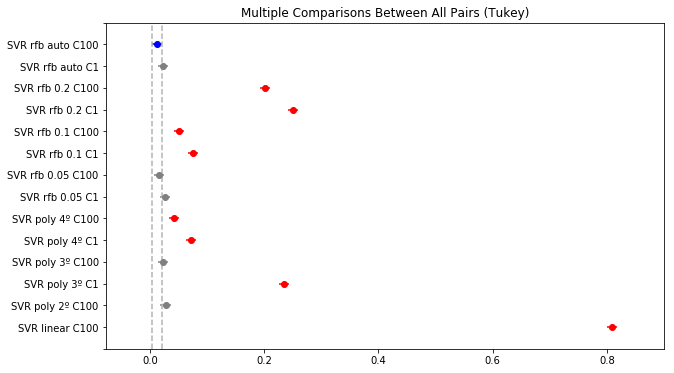

In [127]:
result,best_group = tukey_test(res_test, 2, 16, etiquetas)

In [128]:
resultados = result._results_table.data
group1 = resultados[0].index('group1')
group2 = resultados[0].index('group2')
reject = resultados[0].index('reject')
best_groups = []
for row in resultados[1:]:
    if (row[group1] == str(best_group) or row[group2] == str(best_group)) and not row[reject]:
        best_groups.append(row[group1])
        best_groups.append(row[group2])
best_groups.append(best_group)
best_groups = set(best_groups)
sorted(best_groups)

['SVR poly 2º C100',
 'SVR poly 3º C100',
 'SVR rfb 0.05 C1',
 'SVR rfb 0.05 C100',
 'SVR rfb auto C1',
 'SVR rfb auto C100']

Figure(720x432)


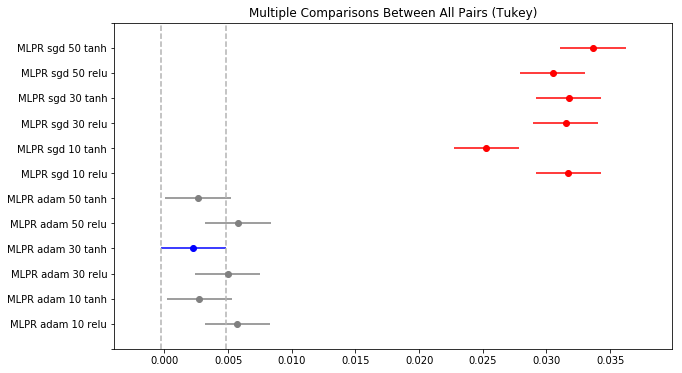

In [129]:
best_list = sorted(best_groups)
result,best_group = tukey_test(res_test, 16, 28, etiquetas)

In [130]:
resultados = result._results_table.data
group1 = resultados[0].index('group1')
group2 = resultados[0].index('group2')
reject = resultados[0].index('reject')
best_groups = []
for row in resultados[1:]:
    if (row[group1] == str(best_group) or row[group2] == str(best_group)) and not row[reject]:
        best_groups.append(row[group1])
        best_groups.append(row[group2])
best_groups.append(best_group)
best_groups = set(best_groups)
sorted(best_groups)

['MLPR adam 10 relu',
 'MLPR adam 10 tanh',
 'MLPR adam 30 relu',
 'MLPR adam 30 tanh',
 'MLPR adam 50 relu',
 'MLPR adam 50 tanh']

In [131]:
best_list += sorted(best_groups)

In [132]:
# Ej: Para los 8 primeros modelos, min_i = 0, max_i = 9.
def tukey_best(res_test, simple_best, etiquetas):
    simple_idx = [etiquetas.index(simple_tag) for simple_tag in simple_best]
    # Para obtener los scores de test de los modelos indicados (30 de cada)
    test = []
    for simple_tag in simple_idx:
        test += [res_test[i][simple_tag] for i in range(res_test.shape[0])]
    flat_test = np.array(test)
    tags = [tag for tag in simple_best for _ in range(res_test.shape[0])]
    # seleccionamos el que tiene mejor media y vemos en el anterior cuales son iguales
    best_group = np.argmin(np.mean(flat_test.reshape((len(simple_best), 30),order='C'), axis=1))
    best_group = tags[int(best_group)*res_test.shape[0]]
    result = pairwise_tukeyhsd(flat_test,tags)
    print(result.plot_simultaneous(comparison_name=best_group))
    return (result,best_group)

Figure(720x432)


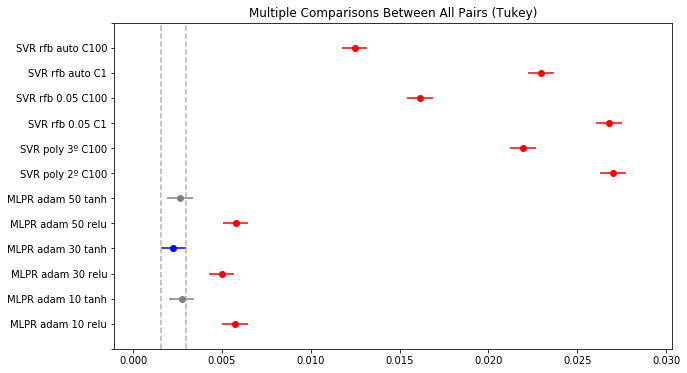

In [133]:
result, best_group = tukey_best(res_test, best_list, etiquetas)

**Nos quedamos con el más sencillo**  
El cual asumimos que es el MLPR con:
- adam (Stochastic gradient-based optimizer)  
- tanh (Hyperbolic tan function)  
- 10 neuronas en la capa oculta

In [134]:
simple_idx = [etiquetas.index(simple_tag) for simple_tag in best_list]
for ind, tag in enumerate(best_list):
    mean_test = np.mean(res_test[:,simple_idx[ind]])
    std_test = np.std(res_test[:,simple_idx[ind]])
    print('{}: {:.4f} +- {:.4f}'.format(tag, mean_test, std_test))

SVR poly 2º C100: 0.0270 +- 0.0020
SVR poly 3º C100: 0.0219 +- 0.0013
SVR rfb 0.05 C1: 0.0268 +- 0.0019
SVR rfb 0.05 C100: 0.0161 +- 0.0013
SVR rfb auto C1: 0.0229 +- 0.0023
SVR rfb auto C100: 0.0125 +- 0.0010
MLPR adam 10 relu: 0.0057 +- 0.0035
MLPR adam 10 tanh: 0.0027 +- 0.0006
MLPR adam 30 relu: 0.0050 +- 0.0010
MLPR adam 30 tanh: 0.0023 +- 0.0004
MLPR adam 50 relu: 0.0058 +- 0.0013
MLPR adam 50 tanh: 0.0026 +- 0.0007


-------------------------------------------

**Tamaño de ventana 50**

In [135]:
with open('p4_henon-res_test_50.bin','rb') as file:
    res_test = pickle.load(file)
with open('p4_henon-etiquetas_50.bin','rb') as file:
    etiquetas = pickle.load(file)

**Test de normalidad**  
Rechazamos normalidad, realizamos el test no paramétrico de Kruskal-Wallis en lugar de un Anova 

In [136]:
np.apply_along_axis(lambda x: stats.shapiro(x)[1], axis=0, arr=res_test)

array([7.10901916e-01, 5.77068567e-01, 5.45762122e-01, 9.98513520e-01,
       6.10155404e-01, 1.69478983e-01, 1.24734409e-01, 7.06209600e-01,
       9.22867537e-01, 1.42733589e-01, 5.16477346e-01, 9.32402492e-01,
       9.63944852e-01, 3.95693421e-01, 7.70855725e-01, 4.32972997e-01,
       8.41898561e-01, 1.01142429e-01, 6.88059807e-01, 2.49090884e-02,
       9.36750730e-05, 2.04332434e-02, 1.59795448e-01, 4.91075660e-08,
       5.22395624e-07, 4.57998581e-08, 1.61466449e-08, 4.74230262e-07])

**Test ANOVA**

In [137]:
print(stats.f_oneway(*zip(*list(res_test))))

F_onewayResult(statistic=462.8229904350119, pvalue=0.0)


**Test de Kruskal-Wallis**  
Rechazamos que las precisiones sean similares

In [138]:
print(stats.kruskal(*zip(*list(res_test))))

KruskalResult(statistic=796.8986829737833, pvalue=1.7417522962462723e-150)


Figure(720x432)


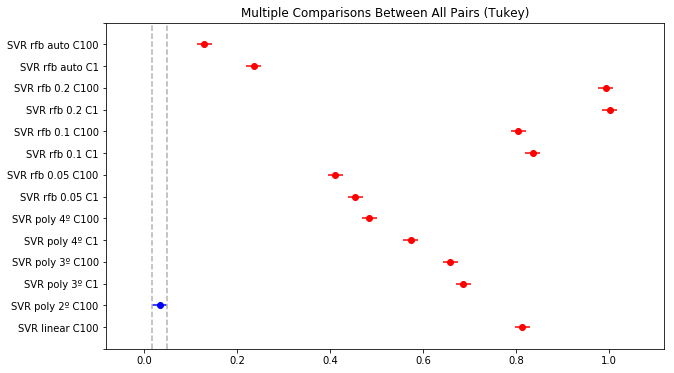

In [144]:
result,best_group = tukey_test(res_test, 2, 16, etiquetas)

In [145]:
resultados = result._results_table.data
group1 = resultados[0].index('group1')
group2 = resultados[0].index('group2')
reject = resultados[0].index('reject')
best_groups = []
for row in resultados[1:]:
    if (row[group1] == str(best_group) or row[group2] == str(best_group)) and not row[reject]:
        best_groups.append(row[group1])
        best_groups.append(row[group2])
best_groups.append(best_group)
best_groups = set(best_groups)
sorted(best_groups)

['SVR poly 2º C100']

Figure(720x432)


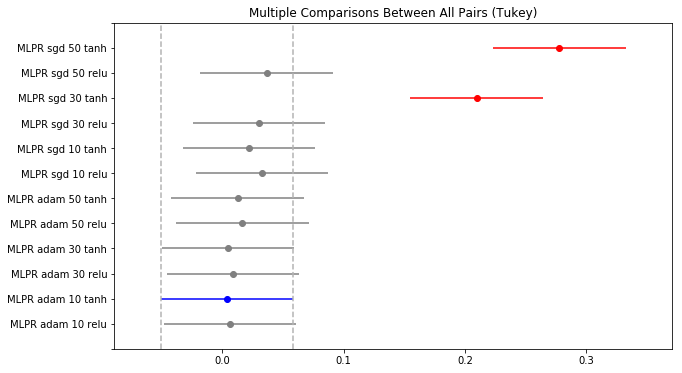

In [146]:
best_list = sorted(best_groups)
result,best_group = tukey_test(res_test, 16, 28, etiquetas)

In [147]:
resultados = result._results_table.data
group1 = resultados[0].index('group1')
group2 = resultados[0].index('group2')
reject = resultados[0].index('reject')
best_groups = []
for row in resultados[1:]:
    if (row[group1] == str(best_group) or row[group2] == str(best_group)) and not row[reject]:
        best_groups.append(row[group1])
        best_groups.append(row[group2])
best_groups.append(best_group)
best_groups = set(best_groups)
sorted(best_groups)

['MLPR adam 10 relu',
 'MLPR adam 10 tanh',
 'MLPR adam 30 relu',
 'MLPR adam 30 tanh',
 'MLPR adam 50 relu',
 'MLPR adam 50 tanh',
 'MLPR sgd 10 relu',
 'MLPR sgd 10 tanh',
 'MLPR sgd 30 relu',
 'MLPR sgd 50 relu']

In [148]:
best_list += sorted(best_groups)

Figure(720x432)


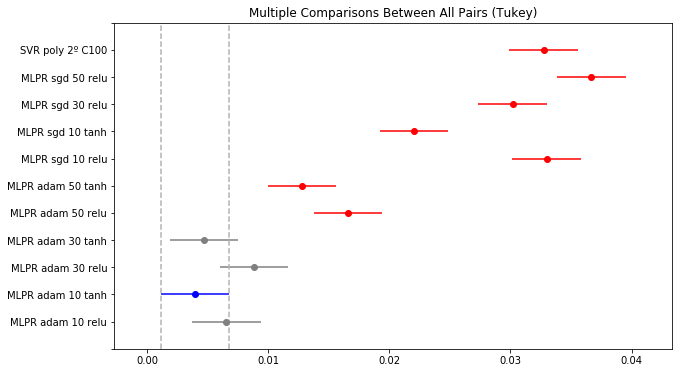

In [149]:
result, best_group = tukey_best(res_test, best_list, etiquetas)

**Nos quedamos con el más sencillo**  
El cual asumimos que es el MLPR con:
- adam (Stochastic gradient-based optimizer)  
- relu (Rectified linear unit function)  
- 10 neuronas en la capa oculta

In [150]:
simple_idx = [etiquetas.index(simple_tag) for simple_tag in best_list]
for ind, tag in enumerate(best_list):
    mean_test = np.mean(res_test[:,simple_idx[ind]])
    std_test = np.std(res_test[:,simple_idx[ind]])
    print('{}: {:.4f} +- {:.4f}'.format(tag, mean_test, std_test))

SVR poly 2º C100: 0.0327 +- 0.0027
MLPR adam 10 relu: 0.0065 +- 0.0027
MLPR adam 10 tanh: 0.0039 +- 0.0029
MLPR adam 30 relu: 0.0088 +- 0.0032
MLPR adam 30 tanh: 0.0047 +- 0.0039
MLPR adam 50 relu: 0.0166 +- 0.0053
MLPR adam 50 tanh: 0.0128 +- 0.0123
MLPR sgd 10 relu: 0.0330 +- 0.0098
MLPR sgd 10 tanh: 0.0220 +- 0.0067
MLPR sgd 30 relu: 0.0302 +- 0.0077
MLPR sgd 50 relu: 0.0367 +- 0.0075
